<a href="https://colab.research.google.com/github/huzaifa003/NewsMachineLearning/blob/main/NewsClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('news_20k.csv')

In [ ]:
data

,Unnamed: 0,Index,Headline,News Text,Category,Date,URL,Source,News length
0,276152,276152,لاہورہائیکورٹ نے محکمہ مال کو زرعی مدن ٹیکس کی...,لاہوراردو پوائنٹ اخبارتازہ ترین لائن16 مئی2016...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,542.0
1,257971,257971,زرعی شعبہ میں تحقیقی سرگرمیوں کے فروغ کے لئی12...,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,Business & Economics,10 مارچ2017ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,698.0
2,217973,217973,ایشین سٹاک مارکیٹس میں مندی,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,Business & Economics,16 ستمبر2019ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,310.0
3,297403,297403,کراچی پاکستان پیٹر ولئیم کیعمومی شئیرکیپٹل پر7...,کراچی اردو پوائنٹ اخبار تازہ ترین24 اکتوبر2014...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,1663.0
4,1002075,1002075,اسٹاک مارکیٹ انڈیکس میں86 پوائنٹس کمی سرمایہ م...,کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...,Business & Economics,"Jun 30, 2018",https://www.nawaiwaqt.com.pk/30-Jun-2018/855776,Nawai Waqt News,1210.0
...,...,...,...,...,...,...,...,...,...
1556,1203,1203,حکومت نے بھارت سے جان بچانے والی ادویات کی درم...,حکومت پاکستان نے بھارت سے زندگی بچانے والی ادو...,Business & Economics,2019-09-03,https://www.dawnnews.tv/news/1109997/,Dawn News,1187.0
1557,227400,227400,چینی کمپنی ٹینسنٹکے شیئرز پرائس مزید فیصد کم,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,Business & Economics,11 اکتوبر2018ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,924.0
1558,222950,222950,پی ایم ای ایکس کموڈٹی انڈیکس 3689 کی سطح پر بن...,کراچی اردو پوائنٹ اخبارتازہ ترین این این ئی 20...,Business & Economics,20 فروری2019ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,953.0
1559,1015047,1015047,رمضان بازاروں میں اشیاء سستی اور معیاری ہیں مل...,لاہور مسلم لیگ لاہور کے جوائنٹ سیکرٹری ملک محم...,Business & Economics,"Jun 24, 2016",https://www.nawaiwaqt.com.pk/24-Jun-2016/486373,Nawai Waqt News,401.0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'news_20k.csv'
df = pd.read_csv(file_path)

# Text Cleaning (example, might need adjustments based on the actual text)
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

urdu_stopwords = [
    'اور', 'میں', 'کو', 'سے', 'کے', 'ہیں', 'کا', 'کہ', 'یہ', 'پر', 'ایک', 'گی', 'جو', 'نے', 'بھی', 'ہے'
]
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join(word for word in text.split() if word not in urdu_stopwords)
    return text

df['cleaned_text'] = df['News Text'].apply(clean_text)

# Check the cleaned text
print(df['cleaned_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    لاہوراردو پوائنٹ اخبارتازہ ترین لائن مئیءلاہور...
1    اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...
2    ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...
3    کراچی اردو پوائنٹ اخبار تازہ ترین اکتوبرء پاکس...
4    کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...
Name: cleaned_text, dtype: object


In [ ]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['cleaned_text'])

# Check the shape of the TF-IDF matrix
print(X.shape)


(20000, 1000)


In [ ]:
# Clustering using K-Means
num_clusters = len(df['Category'].unique())  # Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Check the distribution of clusters
print(df['cluster'].value_counts())
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
2    12384
0     3729
1     2134
3     1753
Name: count, dtype: int64


,Unnamed: 0,Index,Headline,News Text,Category,Date,URL,Source,News length,cleaned_text,cluster
0,276152,276152,لاہورہائیکورٹ نے محکمہ مال کو زرعی مدن ٹیکس کی...,لاہوراردو پوائنٹ اخبارتازہ ترین لائن16 مئی2016...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,542,لاہوراردو پوائنٹ اخبارتازہ ترین لائن مئیءلاہور...,2
1,257971,257971,زرعی شعبہ میں تحقیقی سرگرمیوں کے فروغ کے لئی12...,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,Business & Economics,10 مارچ2017ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,698,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,2
2,217973,217973,ایشین سٹاک مارکیٹس میں مندی,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,Business & Economics,16 ستمبر2019ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,310,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,1
3,297403,297403,کراچی پاکستان پیٹر ولئیم کیعمومی شئیرکیپٹل پر7...,کراچی اردو پوائنٹ اخبار تازہ ترین24 اکتوبر2014...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,1663,کراچی اردو پوائنٹ اخبار تازہ ترین اکتوبرء پاکس...,2
4,1002075,1002075,اسٹاک مارکیٹ انڈیکس میں86 پوائنٹس کمی سرمایہ م...,کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...,Business & Economics,"Jun 30, 2018",https://www.nawaiwaqt.com.pk/30-Jun-2018/855776,Nawai Waqt News,1210,کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,783295,783295,شاداب خان کی شعیب ملک اور ثانیہ مرزا کوشادی کی...,لاہور ڈیلی پاکستان لائن قومی کرکٹ ٹیم کے کھلاڑ...,Sports,"Apr 13, 2018 | 19:22:PM",https://dailypakistan.com.pk/13-Apr-2018/764149,Daily Pakistan com PK News,924,لاہور ڈیلی پاکستان لائن قومی کرکٹ ٹیم کھلاڑی ش...,2
19996,337160,337160,کراچی یوم دفاع پاکستان شوٹنگ بال فیسٹیول میچ ک...,کراچیاردو پوائنٹ اخبارتازہ ترین این این ئی 05 ...,Sports,جمعرات 5 ستمبر 2019 23:07,https://www.urdupoint.com/sports/detail-news/l...,Urdu Point News,649,کراچیاردو پوائنٹ اخبارتازہ ترین این این ئی ستم...,2
19997,455410,455410,ازبکستان کے ڈینس ایسٹومین سٹریا کے جوئرگن میلز...,برسبیناردو پوائنٹ اخبار تازہ ترینئی این پی3جنو...,Sports,جمعرات 3 جنوری 2013 19:35,https://www.urdupoint.com/sports/detail-news/l...,Urdu Point News,503,برسبیناردو پوائنٹ اخبار تازہ ترینئی این پیجنور...,0
19998,607986,607986,ورلڈ کپ مہم میں انگلینڈ کا فاتحانہ اغاز,لندندنیائے کرکٹ کے سب سے بڑے ایونٹ کے افتتاحی ...,Sports,30-May-19,https://www.humnews.pk/latest/168145/,HUM News,4307,لندندنیائے کرکٹ سب بڑے ایونٹ افتتاحی میچ انگلی...,0


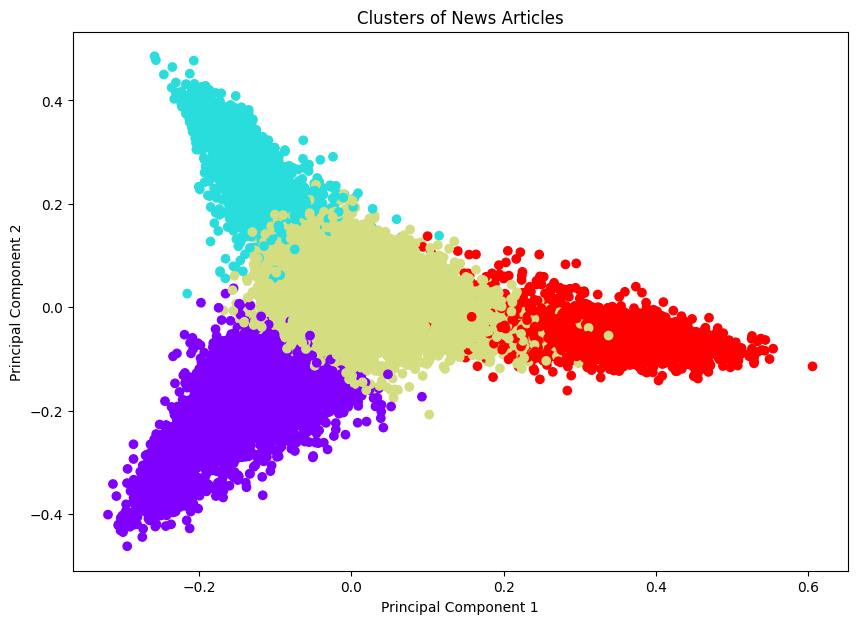

In [ ]:
# Visualizing the clusters (optional)
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'], cmap='rainbow')
plt.title('Clusters of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
data = pd.read_csv('news_20k.csv')

In [18]:
# Let's first check the distribution of the categories in the dataset
category_distribution = data['Category'].value_counts()
category_distribution


Category
Business & Economics    5000
Entertainment           5000
Science & Technology    5000
Sports                  5000
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Cleaning the text: simple cleaning by lowering the case and removing extra spaces
data['cleaned_text'] = data['News Text'].str.lower().str.strip()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'],
    data['Category'],
    test_size=0.2,
    random_state=42
)

# Initializing the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fitting the vectorizer on the training data and transforming both train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display the shape of the transformed training data and test data
X_train_tfidf.shape, X_test_tfidf.shape


((16000, 10000), (4000, 10000))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train_tfidf, y_train_encoded)

# Predicting the categories on the test set
y_pred = model.predict(X_test_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)

# Generating a classification report to see precision, recall, and F1-score
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

accuracy, classification_rep


(0.94175,
 '                      precision    recall  f1-score   support\n\nBusiness & Economics       0.93      0.93      0.93       995\n       Entertainment       0.97      0.94      0.95      1024\nScience & Technology       0.89      0.94      0.91      1004\n              Sports       0.98      0.97      0.97       977\n\n            accuracy                           0.94      4000\n           macro avg       0.94      0.94      0.94      4000\n        weighted avg       0.94      0.94      0.94      4000\n')

In [22]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train_tfidf, y_train_encoded)

# Predicting the categories on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculating accuracy
accuracy_nb = accuracy_score(y_test_encoded, y_pred_nb)

# Generating a classification report to see precision, recall, and F1-score
classification_rep_nb = classification_report(y_test_encoded, y_pred_nb, target_names=label_encoder.classes_)

accuracy_nb, classification_rep_nb


(0.92825,
 '                      precision    recall  f1-score   support\n\nBusiness & Economics       0.92      0.92      0.92       995\n       Entertainment       0.94      0.94      0.94      1024\nScience & Technology       0.88      0.91      0.89      1004\n              Sports       0.98      0.95      0.96       977\n\n            accuracy                           0.93      4000\n           macro avg       0.93      0.93      0.93      4000\n        weighted avg       0.93      0.93      0.93      4000\n')